<a href="https://colab.research.google.com/github/Varun9213/Blog_machine_learing/blob/main/Dataset_pipeline_blog_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade
!pip install pyyaml

In [2]:
from fastai import *
from fastai.vision.all import *
from fastai.imports import *
import yaml, cv2, os
from matplotlib import patches, text, patheffects

In [3]:
root = Path("/content/data")

In [4]:
os.mkdir(root)
os.chdir(root)

In [ ]:
!curl -L "https://public.roboflow.com/ds/pK9BobmV9A?key=G9IUWXkCZA" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [6]:
with open(root/"data.yaml") as file:
  data = yaml.load(file)
data

{'names': ['bishop',
  'black-bishop',
  'black-king',
  'black-knight',
  'black-pawn',
  'black-queen',
  'black-rook',
  'white-bishop',
  'white-king',
  'white-knight',
  'white-pawn',
  'white-queen',
  'white-rook'],
 'nc': 13,
 'train': '../train/images',
 'val': '../valid/images'}

In [7]:
classes = data["names"]

In [8]:
classes[10]

'white-pawn'

In [9]:
path_train = Path("/content/data/train")
path_val = Path("/content/data/valid")
path_test = Path("/content/data/test")

In [10]:
train_images = get_image_files(path_train/"images")

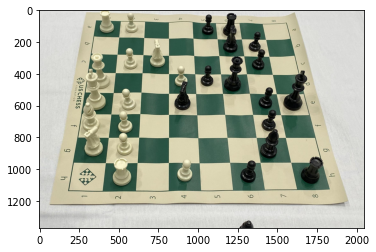

In [11]:
img = cv2.imread(str(train_images[-1]), cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [12]:
img.shape

(1371, 2048, 3)

In [13]:
f = train_images[-1].name[:-4] + ".txt"
with open(root/"train"/"labels"/f, 'r') as file:
  targets = file.read()
targets = targets.split("\n")
targets

['3 0.712890625 0.6129737609329446 0.0732421875 0.14285714285714285',
 '6 0.8388671875 0.7303206997084548 0.076171875 0.1377551020408163',
 '2 0.7880859375 0.3673469387755102 0.076171875 0.20116618075801748',
 '5 0.59765625 0.29373177842565595 0.0634765625 0.1814868804664723',
 '6 0.58740234375 0.06268221574344024 0.05078125 0.11661807580174927',
 '9 0.5888671875 0.130466472303207 0.0537109375 0.13119533527696792',
 '9 0.44091796875 0.39285714285714285 0.0615234375 0.13629737609329445',
 '4 0.51953125 0.0663265306122449 0.04638671875 0.10349854227405247',
 '4 0.67724609375 0.22813411078717202 0.048828125 0.09985422740524781',
 '4 0.66259765625 0.14431486880466474 0.046875 0.09766763848396501',
 '4 0.69873046875 0.40160349854227406 0.05078125 0.10787172011661808',
 '4 0.7060546875 0.5036443148688047 0.0546875 0.10860058309037901',
 '4 0.640625 0.7361516034985423 0.06494140625 0.11151603498542274',
 '4 0.51806640625 0.29737609329446063 0.0478515625 0.10714285714285714',
 '8 0.17236328125

In [14]:
row = [f, *targets[0].split(" ")]
row

['ec4c30d88ecc70b6a3e76dbd9b17324a_jpg.rf.34d31473728f2b9a68bb71a3f40e1d6f.txt',
 '3',
 '0.712890625',
 '0.6129737609329446',
 '0.0732421875',
 '0.14285714285714285']

In [15]:
col = ["name", "class", "center_x", "center_y", "width", "height"]
train_df = pd.DataFrame(columns= col)
train_df

,name,class,center_x,center_y,width,height


In [16]:
row = {}
row[col[0]] = f[:-4]
for i,t in enumerate(targets[0].split(" ")):
  row[col[i+1]] = float(t)
row

{'center_x': 0.712890625,
 'center_y': 0.6129737609329446,
 'class': 3.0,
 'height': 0.14285714285714285,
 'name': 'ec4c30d88ecc70b6a3e76dbd9b17324a_jpg.rf.34d31473728f2b9a68bb71a3f40e1d6f',
 'width': 0.0732421875}

In [17]:
train_df.append(row, ignore_index=True)

,name,class,center_x,center_y,width,height
0,ec4c30d88ecc70b6a3e76dbd9b17324a_jpg.rf.34d31473728f2b9a68bb71a3f40e1d6f,3.0,0.712891,0.612974,0.073242,0.142857


**Data Formating Functions**

In [18]:
def get_targets(image_path):
  f = image_path.name[:-4] + ".txt"
  with open(root/"train"/"labels"/f, 'r') as file:
    targets = file.read()
  return targets.split("\n")

def get_row(image_path, target, col): 
  row = {}
  row[col[0]] = image_path.name[:-4]
  for i,t in enumerate(target.split(" ")):
    row[col[i+1]] = float(t)
  return row

def add_targets_to_df(df, image_path):
  targets = get_targets(image_path)
  df_new = df
  for target in targets:
    row = get_row(image_path, target, df.columns)
    df_new = df_new.append(row, ignore_index = True)
  return df_new

def create_df(cols, images_paths):
  df = pd.DataFrame(columns=cols)
  for path in images_paths:
    df = add_targets_to_df(df, path)
  return df

In [19]:
final_df = create_df(col, train_images)

In [20]:
final_df.head()

,name,class,center_x,center_y,width,height
0,040f2bcba5afce3afafdd5bbf36d2ca5_jpg.rf.6e3358605c2734735af18f31e571692c,10.0,0.276367,0.166910,0.058105,0.108601
1,040f2bcba5afce3afafdd5bbf36d2ca5_jpg.rf.6e3358605c2734735af18f31e571692c,7.0,0.443848,0.430029,0.059570,0.139213
2,040f2bcba5afce3afafdd5bbf36d2ca5_jpg.rf.6e3358605c2734735af18f31e571692c,8.0,0.166016,0.305394,0.076172,0.204810
3,040f2bcba5afce3afafdd5bbf36d2ca5_jpg.rf.6e3358605c2734735af18f31e571692c,11.0,0.347168,0.150146,0.062988,0.177843
4,040f2bcba5afce3afafdd5bbf36d2ca5_jpg.rf.6e3358605c2734735af18f31e571692c,12.0,0.436035,0.340379,0.060059,0.127551


In [21]:
print(len(final_df["name"].unique()), len(train_images))

202 202


In [22]:
bboxes_cols = ["center_x","center_y","width","height"]

In [23]:
final_df[final_df["name"] == train_images[0].name[:-4]][bboxes_cols].values.shape

(14, 4)

In [24]:
final_df[final_df["name"] == train_images[0].name[:-4]]["class"]

0     10.0
1      7.0
2      8.0
3     11.0
4     12.0
5      9.0
6     10.0
7     10.0
8      6.0
9      3.0
10     2.0
11     4.0
12     4.0
13     4.0
Name: class, dtype: float64

In [25]:
def get_target_ds(name, df):

  rows = df[df["name"] == name[:-4]]
  return rows["class"].values, rows[bboxes_cols].values

In [26]:
class ChessDataset(torch.utils.data.Dataset):
  
  def __init__(self, images_path, df):
    super(ChessDataset, self).__init__()
    self.images_path = images_path
    self.df = df

  def __len__(self):
    return len(self.images_path)

  def __getitem__(self,idx):
    img_path = self.images_path[idx]
    img = cv2.imread(str(img_path), cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    target = {}
    labels, boxes = get_target_ds(img_path.name, self.df)
    areas = boxes[:,2] * boxes[:,3]
    iscrowd = torch.zeros((boxes.shape[0],))
    image_id = torch.tensor([idx])
    target["boxes"] = boxes
    target["labels"] = labels
    target["areas"] = areas
    target["iscrowd"] = iscrowd
    target["image_id"] = image_id

    return img, target

In [27]:
dataset = ChessDataset(train_images, final_df)

In [28]:
img , target = dataset.__getitem__(1)
size = img.shape
print(img.shape, target["boxes"], target["labels"])

(1371, 2048, 3) [[0.43994141 0.24344023 0.04638672 0.13338192]] [1.]


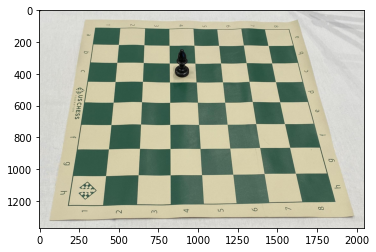

In [29]:
plt.imshow(img)